In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Output')

library("readxl")
library(tidyverse)
library(reshape2)

#reading in file
data <- read_excel("CytokineData_081920.xlsx", sheet = 2)
data_df = data.frame(data)

#reading in demographics file
demographics_data_df = data.frame(read_excel("SubjectInfo_081920.xlsx", sheet = 2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
#adding demographics data to cytokine df
#could've made my life easier by just using full_join but didn't need every column from the demographics data set
race = c()
ethnicity = c()
sex = c()
age = c()
BMI = c()
for (i in 1:length(data_df$SubjectNo)){
    for(j in 1:length(demographics_data_df$SubjectNo)){
        if (data_df$SubjectNo[i] == demographics_data_df$SubjectNo[j]){
            race = c(race, demographics_data_df$Race[j])
            ethnicity = c(ethnicity, demographics_data_df$Ethnicity[j])
            sex = c(sex, demographics_data_df$Sex[j])
            age = c(age, demographics_data_df$Age[j])
            BMI = c(BMI, demographics_data_df$BMI[j])
        }
    }
}

data_df$Race = race
data_df$Ethnicity = ethnicity
data_df$Sex = sex
data_df$Age = age
data_df$BMI = BMI

First running "crude" model by running ANOVA to compare cytokine profiles across compartments. Then running ANCOVA to compare cytokine profiles across compartments adjusting for race and sex separately. Z-score normalizing for  cytokines (using pseudolog2 transformed concentrations).

In [3]:
head(data_df)

,Original_Identifier,Protein,Conc,Conc_pslog2,Compartment,SubjectNo,Group,SubjectID,Race,Ethnicity,Sex,Age,BMI
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,E_C_F_002,IFNg,17.642316,4.220509,ELF,1,NS,NS_1,W,NH,F,28,37.67
2,E_C_F_002,IL10,2.873724,1.953721,ELF,1,NS,NS_1,W,NH,F,28,37.67
3,E_C_F_002,IL12p70,1.625272,1.392467,ELF,1,NS,NS_1,W,NH,F,28,37.67
4,E_C_F_002,IL13,36.117692,5.214035,ELF,1,NS,NS_1,W,NH,F,28,37.67
5,E_C_F_002,IL1b,104.409217,6.719857,ELF,1,NS,NS_1,W,NH,F,28,37.67
6,E_C_F_002,IL6,21.159536,4.469856,ELF,1,NS,NS_1,W,NH,F,28,37.67


In [4]:
#making race binary between black and non- black subjects
for (i in 1:length(data_df$Race)){
    if(data_df$Race[i] != 'AA'){
        data_df$Race[i] = 'NB'
    }
}

In [5]:
#scaling the concentration values by protein normalizes the distribution
scaled_data_df = data_df %>%
    filter(Group == 'NS') %>% #non-smokers only
    group_by(Protein) %>% #this groups by compartment first and then proteins within each compartment
    mutate(Scaled_Concentrations = scale(Conc_pslog2)) %>%
    arrange(Compartment, Protein, SubjectID) #arranges by compartment, then protein, then subjectid
head(scaled_data_df)

Original_Identifier,Protein,Conc,Conc_pslog2,Compartment,SubjectNo,Group,SubjectID,Race,Ethnicity,Sex,Age,BMI,Scaled_Concentrations
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,"<dbl[,1]>"
E_C_F_002,Eotaxin,147.64524,7.215729,ELF,1,NS,NS_1,NB,NH,F,28,37.67,0.4682499
E_C_M_122,Eotaxin,257.88962,8.016193,ELF,10,NS,NS_10,NB,NH,M,34,19.80,0.7153580
E_C_M_123,Eotaxin,75.86487,6.264252,ELF,11,NS,NS_11,NB,NH,M,24,26.10,0.1745230
E_C_M_130,Eotaxin,121.64497,6.938344,ELF,12,NS,NS_12,NB,NH,M,26,20.00,0.3826194
E_C_M_138,Eotaxin,34.57231,5.152683,ELF,13,NS,NS_13,NB,H,M,39,36.80,-0.1686254
E_C_M_140,Eotaxin,244.21306,7.937892,ELF,14,NS,NS_14,NB,NH,M,31,29.70,0.6911859


In [6]:
# creating a df for each cytokine individually
Eotaxin_scaled = scaled_data_df %>% filter(Protein == 'Eotaxin')
Eotaxin3_scaled = scaled_data_df %>% filter(Protein == 'Eotaxin3')
Fractalkine_scaled = scaled_data_df %>% filter(Protein == 'Fractalkine')
I309_scaled = scaled_data_df %>% filter(Protein == 'I309')
IFNg_scaled = scaled_data_df %>% filter(Protein == 'IFNg')
IL10_scaled = scaled_data_df %>% filter(Protein == 'IL10')
IL12p70_scaled = scaled_data_df %>% filter(Protein == 'IL12p70')
IL13_scaled = scaled_data_df %>% filter(Protein == 'IL13')
IL17B_scaled = scaled_data_df %>% filter(Protein == 'IL17B')
IL17D_scaled = scaled_data_df %>% filter(Protein == 'IL17D')
IL1b_scaled = scaled_data_df %>% filter(Protein == 'IL1b')
IL4_scaled = scaled_data_df %>% filter(Protein == 'IL4')
IL6_scaled = scaled_data_df %>% filter(Protein == 'IL6')
IL8_scaled = scaled_data_df %>% filter(Protein == 'IL8')
IP10_scaled = scaled_data_df %>% filter(Protein == 'IP10')
ITAC_scaled = scaled_data_df %>% filter(Protein == 'ITAC')
MCP1_scaled = scaled_data_df %>% filter(Protein == 'MCP1')
MIG_scaled = scaled_data_df %>% filter(Protein == 'MIG')
MIP1a_scaled = scaled_data_df %>% filter(Protein == 'MIP1a')
MIP1b_scaled = scaled_data_df %>% filter(Protein == 'MIP1b')
TARC_scaled = scaled_data_df %>% filter(Protein == 'TARC')
TNFa_scaled = scaled_data_df %>% filter(Protein == 'TNFa')

## One-way Anova

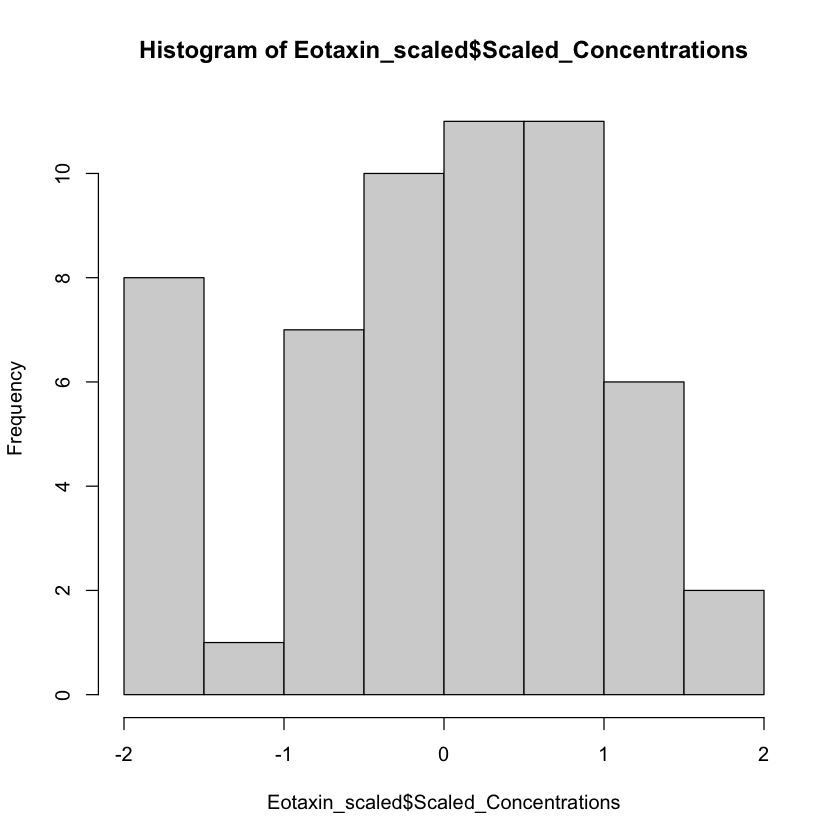

In [7]:
#checking for normal distribution
hist(Eotaxin_scaled$Scaled_Concentrations)

In [8]:
#formatting data to be put into the anova function 
change_data_types = function(scaled_df){
    #making compartment and covariates into factors
    scaled_df$Compartment = factor(scaled_df$Compartment, labels = c(unique(scaled_df$Compartment)))
    scaled_df$Race = factor(scaled_df$Race, labels = c(unique(scaled_df$Race)))
    
    #making scaled_concentrations col into a numeric
    scaled_df$Scaled_Concentrations = as.numeric(scaled_df$Scaled_Concentrations)
    return(scaled_df)
}

#calling fn
Eotaxin_scaled_factored = change_data_types(Eotaxin_scaled)
Eotaxin3_scaled_factored = change_data_types(Eotaxin3_scaled)
Fractalkine_scaled_factored = change_data_types(Fractalkine_scaled)
I309_scaled_factored = change_data_types(I309_scaled)
IFNg_scaled_factored = change_data_types(IFNg_scaled)
IL10_scaled_factored = change_data_types(IL10_scaled)
IL12p70_scaled_factored = change_data_types(IL12p70_scaled)
IL13_scaled_factored = change_data_types(IL13_scaled)
IL17B_scaled_factored = change_data_types(IL17B_scaled)
IL17D_scaled_factored = change_data_types(IL17D_scaled)
IL1b_scaled_factored = change_data_types(IL1b_scaled)
IL4_scaled_factored = change_data_types(IL4_scaled)
IL6_scaled_factored = change_data_types(IL6_scaled)
IL8_scaled_factored = change_data_types(IL8_scaled)
IP10_scaled_factored = change_data_types(IP10_scaled)
ITAC_scaled_factored = change_data_types(ITAC_scaled)
MCP1_scaled_factored = change_data_types(MCP1_scaled)
MIG_scaled_factored = change_data_types(MIG_scaled)
MIP1a_scaled_factored = change_data_types(MIP1a_scaled)
MIP1b_scaled_factored = change_data_types(MIP1b_scaled)
TARC_scaled_factored = change_data_types(TARC_scaled)
TNFa_scaled_factored = change_data_types(TNFa_scaled)

In [9]:
#contrasts show what compartments are being compared in anova
#these comparisons aren't what we want so I changed them in the function below
contrasts(Eotaxin_scaled_factored$Compartment)

,NLF,Serum,Sputum
ELF,0,0,0
NLF,1,0,0
Serum,0,1,0
Sputum,0,0,1


                      Table of Contrasts
>                 NLF (Baseline) | ELF | Sputum | Serum | Sum
>     Contrast 1 |         -3    |  1  |   1    |   1   |  0
>     Contrast 2 |         0     | -2  |   1    |   1   |  0
>     Contrast 3 |         0     |  0  |   -1   |   1   |  0

> - Contrast 1: compares NLF to all other compartments
> - Contrast 2: compares ELF to Sputum, Serum
> - Contrast 3: compares Sputum to Serum

In [10]:
get_anova = function(scaled_df){
    contrasts(scaled_df$Compartment) = cbind(c(1,-3,1,1),c(-2,0,1,1), c(0,0,-1,1)) #meaning is specified above
    anova = aov(Scaled_Concentrations~Compartment, data = scaled_df)
    return(anova)
}

#calling fn
Eotaxin_anova = get_anova(Eotaxin_scaled_factored)
Eotaxin3_anova = get_anova(Eotaxin3_scaled_factored)
Fractalkine_anova = get_anova(Fractalkine_scaled_factored)
I309_anova = get_anova(I309_scaled_factored)
IFNg_anova = get_anova(IFNg_scaled_factored)
IL10_anova = get_anova(IL10_scaled_factored)
IL12p70_anova = get_anova(IL12p70_scaled_factored)
IL13_anova = get_anova(IL13_scaled_factored)
IL17B_anova = get_anova(IL17B_scaled_factored)
IL17D_anova = get_anova(IL17D_scaled_factored)
IL1b_anova = get_anova(IL1b_scaled_factored)
IL4_anova = get_anova(IL4_scaled_factored)
IL6_anova = get_anova(IL6_scaled_factored)
IL8_anova = get_anova(IL8_scaled_factored)
IP10_anova = get_anova(IP10_scaled_factored)
ITAC_anova = get_anova(ITAC_scaled_factored)
MCP1_anova = get_anova(MCP1_scaled_factored)
MIG_anova = get_anova(MIG_scaled_factored)
MIP1a_anova = get_anova(MIP1a_scaled_factored)
MIP1b_anova = get_anova(MIP1b_scaled_factored)
TARC_anova = get_anova(TARC_scaled_factored)
TNFa_anova = get_anova(TNFa_scaled_factored)

All of these yielded statistically significant results except IP10. ANOVA tests only tell us if there are differences between groups (cytokines), hence we need a Tukey's test for post hoc to do that.

In [45]:
# Tukey's post hoc
Eotaxin_tukey_anova = TukeyHSD(Eotaxin_anova)
Eotaxin3_tukey_anova = TukeyHSD(Eotaxin3_anova)
Fractalkine_tukey_anova = TukeyHSD(Fractalkine_anova)
I309_tukey_anova = TukeyHSD(I309_anova)
IFNg_tukey_anova = TukeyHSD(IFNg_anova)
IL10_tukey_anova = TukeyHSD(IL10_anova)
IL12p70_tukey_anova = TukeyHSD(IL12p70_anova)
IL13_tukey_anova = TukeyHSD(IL13_anova)
IL17B_tukey_anova = TukeyHSD(IL17B_anova)
IL17D_tukey_anova = TukeyHSD(IL17D_anova)
IL1b_tukey_anova = TukeyHSD(IL1b_anova)
IL4_tukey_anova = TukeyHSD(IL4_anova)
IL6_tukey_anova = TukeyHSD(IL6_anova)
IL8_tukey_anova = TukeyHSD(IL8_anova)
IP10_tukey_anova = TukeyHSD(IP10_anova)
ITAC_tukey_anova = TukeyHSD(ITAC_anova)
MCP1_tukey_anova = TukeyHSD(MCP1_anova)
MIG_tukey_anova = TukeyHSD(MIG_anova)
MIP1a_tukey_anova = TukeyHSD(MIP1a_anova)
MIP1b_tukey_anova = TukeyHSD(MIP1b_anova)
TARC_tukey_anova = TukeyHSD(TARC_anova)
TNFa_tukey_anova = TukeyHSD(TNFa_anova)

# ANCOVA

In [12]:
#controlling for race
get_ancova_race = function(scaled_df){
    contrasts(scaled_df$Compartment) = cbind(c(1,-3,1,1),c(-2,0,1,1), c(0,0,-1,1))
    ancova = aov(Scaled_Concentrations~Compartment+Race, data = scaled_df) 
    return(ancova)
}

#calling fn
Eotaxin_ancova_race = get_ancova_race(Eotaxin_scaled_factored)
Eotaxin3_ancova_race = get_ancova_race(Eotaxin3_scaled_factored)
Fractalkine_ancova_race = get_ancova_race(Fractalkine_scaled_factored)
I309_ancova_race = get_ancova_race(I309_scaled_factored)
IFNg_ancova_race = get_ancova_race(IFNg_scaled_factored)
IL10_ancova_race = get_ancova_race(IL10_scaled_factored)
IL12p70_ancova_race = get_ancova_race(IL12p70_scaled_factored)
IL13_ancova_race = get_ancova_race(IL13_scaled_factored)
IL17B_ancova_race = get_ancova_race(IL17B_scaled_factored)
IL17D_ancova_race = get_ancova_race(IL17D_scaled_factored)
IL1b_ancova_race = get_ancova_race(IL1b_scaled_factored)
IL4_ancova_race = get_ancova_race(IL4_scaled_factored)
IL6_ancova_race = get_ancova_race(IL6_scaled_factored)
IL8_ancova_race = get_ancova_race(IL8_scaled_factored)
IP10_ancova_race = get_ancova_race(IP10_scaled_factored)
ITAC_ancova_race = get_ancova_race(ITAC_scaled_factored)
MCP1_ancova_race = get_ancova_race(MCP1_scaled_factored)
MIG_ancova_race = get_ancova_race(MIG_scaled_factored)
MIP1a_ancova_race = get_ancova_race(MIP1a_scaled_factored)
MIP1b_ancova_race = get_ancova_race(MIP1b_scaled_factored)
TARC_ancova_race = get_ancova_race(TARC_scaled_factored)
TNFa_ancova_race = get_ancova_race(TNFa_scaled_factored)

In [46]:
# Tukey's post hoc
Eotaxin_tukey_ancova_race = TukeyHSD(Eotaxin_ancova_race)
Eotaxin3_tukey_ancova_race = TukeyHSD(Eotaxin3_ancova_race)
Fractalkine_tukey_ancova_race = TukeyHSD(Fractalkine_ancova_race)
I309_tukey_ancova_race = TukeyHSD(I309_ancova_race)
IFNg_tukey_ancova_race = TukeyHSD(IFNg_ancova_race)
IL10_tukey_ancova_race = TukeyHSD(IL10_ancova_race)
IL12p70_tukey_ancova_race = TukeyHSD(IL12p70_ancova_race)
IL13_tukey_ancova_race = TukeyHSD(IL13_ancova_race)
IL17B_tukey_ancova_race = TukeyHSD(IL17B_ancova_race)
IL17D_tukey_ancova_race = TukeyHSD(IL17D_ancova_race)
IL1b_tukey_ancova_race = TukeyHSD(IL1b_ancova_race)
IL4_tukey_ancova_race = TukeyHSD(IL4_ancova_race)
IL6_tukey_ancova_race = TukeyHSD(IL6_ancova_race)
IL8_tukey_ancova_race = TukeyHSD(IL8_ancova_race)
IP10_tukey_ancova_race = TukeyHSD(IP10_ancova_race)
ITAC_tukey_ancova_race = TukeyHSD(ITAC_ancova_race)
MCP1_tukey_ancova_race = TukeyHSD(MCP1_ancova_race)
MIG_tukey_ancova_race = TukeyHSD(MIG_ancova_race)
MIP1a_tukey_ancova_race = TukeyHSD(MIP1a_ancova_race)
MIP1b_tukey_ancova_race = TukeyHSD(MIP1b_ancova_race)
TARC_tukey_ancova_race = TukeyHSD(TARC_ancova_race)
TNFa_tukey_ancova_race = TukeyHSD(TNFa_ancova_race)

In [14]:
#controlling for sex
get_ancova_sex = function(scaled_df){
    contrasts(scaled_df$Compartment) = cbind(c(1,-3,1,1),c(-2,0,1,1), c(0,0,-1,1)) #meaning is explained above
    ancova = aov(Scaled_Concentrations~Compartment+Sex, data = scaled_df)
    return(ancova)
}

#calling fn
Eotaxin_ancova_sex = get_ancova_sex(Eotaxin_scaled_factored)
Eotaxin3_ancova_sex = get_ancova_sex(Eotaxin3_scaled_factored)
Fractalkine_ancova_sex = get_ancova_sex(Fractalkine_scaled_factored)
I309_ancova_sex = get_ancova_sex(I309_scaled_factored)
IFNg_ancova_sex = get_ancova_sex(IFNg_scaled_factored)
IL10_ancova_sex = get_ancova_sex(IL10_scaled_factored)
IL12p70_ancova_sex = get_ancova_sex(IL12p70_scaled_factored)
IL13_ancova_sex = get_ancova_sex(IL13_scaled_factored)
IL17B_ancova_sex = get_ancova_sex(IL17B_scaled_factored)
IL17D_ancova_sex = get_ancova_sex(IL17D_scaled_factored)
IL1b_ancova_sex = get_ancova_sex(IL1b_scaled_factored)
IL4_ancova_sex = get_ancova_sex(IL4_scaled_factored)
IL6_ancova_sex = get_ancova_sex(IL6_scaled_factored)
IL8_ancova_sex = get_ancova_sex(IL8_scaled_factored)
IP10_ancova_sex = get_ancova_sex(IP10_scaled_factored)
ITAC_ancova_sex = get_ancova_sex(ITAC_scaled_factored)
MCP1_ancova_sex = get_ancova_sex(MCP1_scaled_factored)
MIG_ancova_sex = get_ancova_sex(MIG_scaled_factored)
MIP1a_ancova_sex = get_ancova_sex(MIP1a_scaled_factored)
MIP1b_ancova_sex = get_ancova_sex(MIP1b_scaled_factored)
TARC_ancova_sex = get_ancova_sex(TARC_scaled_factored)
TNFa_ancova_sex = get_ancova_sex(TNFa_scaled_factored)

In [47]:
# Tukey's post hoc
Eotaxin_tukey_ancova_sex = TukeyHSD(Eotaxin_ancova_sex)
Eotaxin3_tukey_ancova_sex = TukeyHSD(Eotaxin3_ancova_sex)
Fractalkine_tukey_ancova_sex = TukeyHSD(Fractalkine_ancova_sex)
I309_tukey_ancova_sex = TukeyHSD(I309_ancova_sex)
IFNg_tukey_ancova_sex = TukeyHSD(IFNg_ancova_sex)
IL10_tukey_ancova_sex = TukeyHSD(IL10_ancova_sex)
IL12p70_tukey_ancova_sex = TukeyHSD(IL12p70_ancova_sex)
IL13_tukey_ancova_sex = TukeyHSD(IL13_ancova_sex)
IL17B_tukey_ancova_sex = TukeyHSD(IL17B_ancova_sex)
IL17D_tukey_ancova_sex = TukeyHSD(IL17D_ancova_sex)
IL1b_tukey_ancova_sex = TukeyHSD(IL1b_ancova_sex)
IL4_tukey_ancova_sex = TukeyHSD(IL4_ancova_sex)
IL6_tukey_ancova_sex = TukeyHSD(IL6_ancova_sex)
IL8_tukey_ancova_sex = TukeyHSD(IL8_ancova_sex)
IP10_tukey_ancova_sex = TukeyHSD(IP10_ancova_sex)
ITAC_tukey_ancova_sex = TukeyHSD(ITAC_ancova_sex)
MCP1_tukey_ancova_sex = TukeyHSD(MCP1_ancova_sex)
MIG_tukey_ancova_sex = TukeyHSD(MIG_ancova_sex)
MIP1a_tukey_ancova_sex = TukeyHSD(MIP1a_ancova_sex)
MIP1b_tukey_ancova_sex = TukeyHSD(MIP1b_ancova_sex)
TARC_tukey_ancova_sex = TukeyHSD(TARC_ancova_sex)
TNFa_tukey_ancova_sex = TukeyHSD(TNFa_ancova_sex)

# ANOVA/ANCOVA Tables

In [16]:
extract_values = function(anova_results){
    #extracting certain values from the anova to be put into a table
    cytokine_summary = summary(anova_results)[[1]][1, 2:5] # gets sum sq, mean sq, f value, pvalue
    sum_sq = cytokine_summary$`Sum Sq`
    mean_sq = cytokine_summary$`Mean Sq`
    f_value = cytokine_summary$`F value`
    p_value = cytokine_summary$`Pr(>F)`
    
    cytokine_anova_values = c(sum_sq,mean_sq,f_value,p_value)
    return(cytokine_anova_values)
}

In [17]:
#anova
Eotaxin_anova_values = extract_values(Eotaxin_anova)
Eotaxin3_anova_values = extract_values(Eotaxin3_anova)
Fractalkine_anova_values = extract_values(Fractalkine_anova)
I309_anova_values = extract_values(I309_anova)
IFNg_anova_values = extract_values(IFNg_anova)
IL10_anova_values = extract_values(IL10_anova)
IL12p70_anova_values = extract_values(IL12p70_anova)
IL13_anova_values = extract_values(IL13_anova)
IL17B_anova_values = extract_values(IL17B_anova)
IL17D_anova_values = extract_values(IL17D_anova)
IL1b_anova_values = extract_values(IL1b_anova)
IL4_anova_values = extract_values(IL4_anova)
IL6_anova_values = extract_values(IL6_anova)
IL8_anova_values = extract_values(IL8_anova)
IP10_anova_values = extract_values(IP10_anova)
ITAC_anova_values = extract_values(ITAC_anova)
MCP1_anova_values = extract_values(MCP1_anova)
MIG_anova_values = extract_values(MIG_anova)
MIP1a_anova_values = extract_values(MIP1a_anova)
MIP1b_anova_values = extract_values(MIP1b_anova)
TARC_anova_values = extract_values(TARC_anova)
TNFa_anova_values = extract_values(TNFa_anova)

#ancova race
Eotaxin_ancova_race_values = extract_values(Eotaxin_ancova_race)
Eotaxin3_ancova_race_values = extract_values(Eotaxin3_ancova_race)
Fractalkine_ancova_race_values = extract_values(Fractalkine_ancova_race)
I309_ancova_race_values = extract_values(I309_ancova_race)
IFNg_ancova_race_values = extract_values(IFNg_ancova_race)
IL10_ancova_race_values = extract_values(IL10_ancova_race)
IL12p70_ancova_race_values = extract_values(IL12p70_ancova_race)
IL13_ancova_race_values = extract_values(IL13_ancova_race)
IL17B_ancova_race_values = extract_values(IL17B_ancova_race)
IL17D_ancova_race_values = extract_values(IL17D_ancova_race)
IL1b_ancova_race_values = extract_values(IL1b_ancova_race)
IL4_ancova_race_values = extract_values(IL4_ancova_race)
IL6_ancova_race_values = extract_values(IL6_ancova_race)
IL8_ancova_race_values = extract_values(IL8_ancova_race)
IP10_ancova_race_values = extract_values(IP10_ancova_race)
ITAC_ancova_race_values = extract_values(ITAC_ancova_race)
MCP1_ancova_race_values = extract_values(MCP1_ancova_race)
MIG_ancova_race_values = extract_values(MIG_ancova_race)
MIP1a_ancova_race_values = extract_values(MIP1a_ancova_race)
MIP1b_ancova_race_values = extract_values(MIP1b_ancova_race)
TARC_ancova_race_values = extract_values(TARC_ancova_race)
TNFa_ancova_race_values = extract_values(TNFa_ancova_race)

#ancova sex
Eotaxin_ancova_sex_values = extract_values(Eotaxin_ancova_sex)
Eotaxin3_ancova_sex_values = extract_values(Eotaxin3_ancova_sex)
Fractalkine_ancova_sex_values = extract_values(Fractalkine_ancova_sex)
I309_ancova_sex_values = extract_values(I309_ancova_sex)
IFNg_ancova_sex_values = extract_values(IFNg_ancova_sex)
IL10_ancova_sex_values = extract_values(IL10_ancova_sex)
IL12p70_ancova_sex_values = extract_values(IL12p70_ancova_sex)
IL13_ancova_sex_values = extract_values(IL13_ancova_sex)
IL17B_ancova_sex_values = extract_values(IL17B_ancova_sex)
IL17D_ancova_sex_values = extract_values(IL17D_ancova_sex)
IL1b_ancova_sex_values = extract_values(IL1b_ancova_sex)
IL4_ancova_sex_values = extract_values(IL4_ancova_sex)
IL6_ancova_sex_values = extract_values(IL6_ancova_sex)
IL8_ancova_sex_values = extract_values(IL8_ancova_sex)
IP10_ancova_sex_values = extract_values(IP10_ancova_sex)
ITAC_ancova_sex_values = extract_values(ITAC_ancova_sex)
MCP1_ancova_sex_values = extract_values(MCP1_ancova_sex)
MIG_ancova_sex_values = extract_values(MIG_ancova_sex)
MIP1a_ancova_sex_values = extract_values(MIP1a_ancova_sex)
MIP1b_ancova_sex_values = extract_values(MIP1b_ancova_sex)
TARC_ancova_sex_values = extract_values(TARC_ancova_sex)
TNFa_ancova_sex_values = extract_values(TNFa_ancova_sex)

In [18]:
table_summary = function(Eotaxin, Eotaxin3, Fractalkine, I309,
                                           IFNg, IL10, IL12p70, IL13,
                                           IL17B, IL17D, IL1b, IL4, IL6,
                                           IL8, IP10, ITAC, MCP1, MIG,
                                           MIP1a, MIP1b, TARC, TNFa){
    #comment
    table_initial = rbind(Eotaxin, Eotaxin3, Fractalkine, I309,
                                           IFNg, IL10, IL12p70, IL13,
                                           IL17B, IL17D, IL1b, IL4, IL6,
                                           IL8, IP10, ITAC, MCP1, MIG,
                                           MIP1a, MIP1b, TARC, TNFa)
    
    colnames(table_initial) = c('Sum of Squares','Mean of Sqaures','F Value','p value')
    return(table_initial)
}

#calling function
anova_table = table_summary(Eotaxin_anova_values, Eotaxin3_anova_values, Fractalkine_anova_values,I309_anova_values,
                            IFNg_anova_values, IL10_anova_values, IL12p70_anova_values, IL13_anova_values, 
                            IL17B_anova_values, IL17D_anova_values, IL1b_anova_values, IL4_anova_values, IL6_anova_values,
                            IL8_anova_values, IP10_anova_values, ITAC_anova_values, MCP1_anova_values, MIG_anova_values,
                            MIP1a_anova_values, MIP1b_anova_values, TARC_anova_values, TNFa_anova_values)
ancova_race_table = table_summary(Eotaxin_ancova_race_values, Eotaxin3_ancova_race_values, Fractalkine_ancova_race_values,I309_ancova_race_values,
                            IFNg_ancova_race_values, IL10_ancova_race_values, IL12p70_ancova_race_values, IL13_ancova_race_values, 
                            IL17B_ancova_race_values, IL17D_ancova_race_values, IL1b_ancova_race_values, IL4_ancova_race_values, IL6_ancova_race_values,
                            IL8_ancova_race_values, IP10_ancova_race_values, ITAC_ancova_race_values, MCP1_ancova_race_values, MIG_ancova_race_values,
                            MIP1a_ancova_race_values, MIP1b_ancova_race_values, TARC_ancova_race_values, TNFa_ancova_race_values)
ancova_sex_table = table_summary(Eotaxin_ancova_sex_values, Eotaxin3_ancova_sex_values, Fractalkine_ancova_sex_values,I309_ancova_sex_values,
                            IFNg_ancova_sex_values, IL10_ancova_sex_values, IL12p70_ancova_sex_values, IL13_ancova_sex_values, 
                            IL17B_ancova_sex_values, IL17D_ancova_sex_values, IL1b_ancova_sex_values, IL4_ancova_sex_values, IL6_ancova_sex_values,
                            IL8_ancova_sex_values, IP10_ancova_sex_values, ITAC_ancova_sex_values, MCP1_ancova_sex_values, MIG_ancova_sex_values,
                            MIP1a_ancova_sex_values, MIP1b_ancova_sex_values, TARC_ancova_sex_values, TNFa_ancova_sex_values)

In [22]:
allresults = cbind(anova_table, ancova_race_table, ancova_sex_table)
write.csv(allresults,'/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Output/ANOVA_ANCOVAtable.csv')

# Tukey's HSD Tables

In [56]:
tukey_table_mean_diff = function(Eotaxin, Eotaxin3, Fractalkine, I309,
                                           IFNg, IL10, IL12p70, IL13,
                                           IL17B, IL17D, IL1b, IL4, IL6,
                                           IL8, IP10, ITAC, MCP1, MIG,
                                           MIP1a, MIP1b, TARC, TNFa){
    #comment
    table_initial = rbind(t(Eotaxin[[1]])[1,],t(Eotaxin3[[1]])[1,],t(Fractalkine[[1]])[1,],t(I309[[1]])[1,],
                                           t(IFNg[[1]])[1,],t(IL10[[1]])[1,],t(IL12p70[[1]])[1,],t(IL13[[1]])[1,],
                                           t(IL17B[[1]])[1,],t(IL17D[[1]])[1,],t(IL1b[[1]])[1,],t(IL4[[1]])[1,],
                                           t(IL6[[1]])[1,], t(IL8[[1]])[1,],t(IP10[[1]])[1,],t(ITAC[[1]])[1,],
                                           t(MCP1[[1]])[1,],t(MIG[[1]])[1,],t(MIP1a[[1]])[1,],t(MIP1b[[1]])[1,],
                                           t(TARC[[1]])[1,],t(TNFa[[1]])[1,]) #get mean differences
    return(table_initial)   
}

#calling function
tukey_anova_table = tukey_table_mean_diff(Eotaxin_tukey_anova, Eotaxin3_tukey_anova, Fractalkine_tukey_anova,I309_tukey_anova,
                            IFNg_tukey_anova, IL10_tukey_anova, IL12p70_tukey_anova, IL13_tukey_anova, 
                            IL17B_tukey_anova, IL17D_tukey_anova, IL1b_tukey_anova, IL4_tukey_anova, IL6_tukey_anova,
                            IL8_tukey_anova, IP10_tukey_anova, ITAC_tukey_anova, MCP1_tukey_anova, MIG_tukey_anova,
                            MIP1a_tukey_anova, MIP1b_tukey_anova, TARC_tukey_anova, TNFa_tukey_anova)
tukey_ancova_race_table = tukey_table_mean_diff(Eotaxin_tukey_ancova_race, Eotaxin3_tukey_ancova_race, Fractalkine_tukey_ancova_race,I309_tukey_ancova_race,
                            IFNg_tukey_ancova_race, IL10_tukey_ancova_race, IL12p70_tukey_ancova_race, IL13_tukey_ancova_race, 
                            IL17B_tukey_ancova_race, IL17D_tukey_ancova_race, IL1b_tukey_ancova_race, IL4_tukey_ancova_race, IL6_tukey_ancova_race,
                            IL8_tukey_ancova_race, IP10_tukey_ancova_race, ITAC_tukey_ancova_race, MCP1_tukey_ancova_race, MIG_tukey_ancova_race,
                            MIP1a_tukey_ancova_race, MIP1b_tukey_ancova_race, TARC_tukey_ancova_race, TNFa_tukey_ancova_race)
tukey_ancova_sex_table = tukey_table_mean_diff(Eotaxin_tukey_ancova_sex, Eotaxin3_tukey_ancova_sex, Fractalkine_tukey_ancova_sex,I309_tukey_ancova_sex,
                            IFNg_tukey_ancova_sex, IL10_tukey_ancova_sex, IL12p70_tukey_ancova_sex, IL13_tukey_ancova_sex, 
                            IL17B_tukey_ancova_sex, IL17D_tukey_ancova_sex, IL1b_tukey_ancova_sex, IL4_tukey_ancova_sex, IL6_tukey_ancova_sex,
                            IL8_tukey_ancova_sex, IP10_tukey_ancova_sex, ITAC_tukey_ancova_sex, MCP1_tukey_ancova_sex, MIG_tukey_ancova_sex,
                            MIP1a_tukey_ancova_sex, MIP1b_tukey_ancova_sex, TARC_tukey_ancova_sex, TNFa_tukey_ancova_sex)

In [66]:
tukey_table_pvalue = function(Eotaxin, Eotaxin3, Fractalkine, I309,
                                           IFNg, IL10, IL12p70, IL13,
                                           IL17B, IL17D, IL1b, IL4, IL6,
                                           IL8, IP10, ITAC, MCP1, MIG,
                                           MIP1a, MIP1b, TARC, TNFa){
    #comment
    table_initial = rbind(t(Eotaxin[[1]])[4,],t(Eotaxin3[[1]])[4,],t(Fractalkine[[1]])[4,],t(I309[[1]])[4,],
                                           t(IFNg[[1]])[4,],t(IL10[[1]])[4,],t(IL12p70[[1]])[4,],t(IL13[[1]])[4,],
                                           t(IL17B[[1]])[4,],t(IL17D[[1]])[4,],t(IL1b[[1]])[4,],t(IL4[[1]])[4,],
                                           t(IL6[[1]])[4,], t(IL8[[1]])[4,],t(IP10[[1]])[4,],t(ITAC[[1]])[4,],
                                           t(MCP1[[1]])[4,],t(MIG[[1]])[4,],t(MIP1a[[1]])[4,],t(MIP1b[[1]])[4,],
                                           t(TARC[[1]])[4,],t(TNFa[[1]])[4,]) #get p value
    return(table_initial)   
}

#calling function
tukey_anova_table = tukey_table_pvalue(Eotaxin_tukey_anova, Eotaxin3_tukey_anova, Fractalkine_tukey_anova,I309_tukey_anova,
                            IFNg_tukey_anova, IL10_tukey_anova, IL12p70_tukey_anova, IL13_tukey_anova, 
                            IL17B_tukey_anova, IL17D_tukey_anova, IL1b_tukey_anova, IL4_tukey_anova, IL6_tukey_anova,
                            IL8_tukey_anova, IP10_tukey_anova, ITAC_tukey_anova, MCP1_tukey_anova, MIG_tukey_anova,
                            MIP1a_tukey_anova, MIP1b_tukey_anova, TARC_tukey_anova, TNFa_tukey_anova)
tukey_ancova_race_table = tukey_table_pvalue(Eotaxin_tukey_ancova_race, Eotaxin3_tukey_ancova_race, Fractalkine_tukey_ancova_race,I309_tukey_ancova_race,
                            IFNg_tukey_ancova_race, IL10_tukey_ancova_race, IL12p70_tukey_ancova_race, IL13_tukey_ancova_race, 
                            IL17B_tukey_ancova_race, IL17D_tukey_ancova_race, IL1b_tukey_ancova_race, IL4_tukey_ancova_race, IL6_tukey_ancova_race,
                            IL8_tukey_ancova_race, IP10_tukey_ancova_race, ITAC_tukey_ancova_race, MCP1_tukey_ancova_race, MIG_tukey_ancova_race,
                            MIP1a_tukey_ancova_race, MIP1b_tukey_ancova_race, TARC_tukey_ancova_race, TNFa_tukey_ancova_race)
tukey_ancova_sex_table = tukey_table_pvalue(Eotaxin_tukey_ancova_sex, Eotaxin3_tukey_ancova_sex, Fractalkine_tukey_ancova_sex,I309_tukey_ancova_sex,
                            IFNg_tukey_ancova_sex, IL10_tukey_ancova_sex, IL12p70_tukey_ancova_sex, IL13_tukey_ancova_sex, 
                            IL17B_tukey_ancova_sex, IL17D_tukey_ancova_sex, IL1b_tukey_ancova_sex, IL4_tukey_ancova_sex, IL6_tukey_ancova_sex,
                            IL8_tukey_ancova_sex, IP10_tukey_ancova_sex, ITAC_tukey_ancova_sex, MCP1_tukey_ancova_sex, MIG_tukey_ancova_sex,
                            MIP1a_tukey_ancova_sex, MIP1b_tukey_ancova_sex, TARC_tukey_ancova_sex, TNFa_tukey_ancova_sex)

# ANCOVA Plots

`summarise()` ungrouping output (override with `.groups` argument)



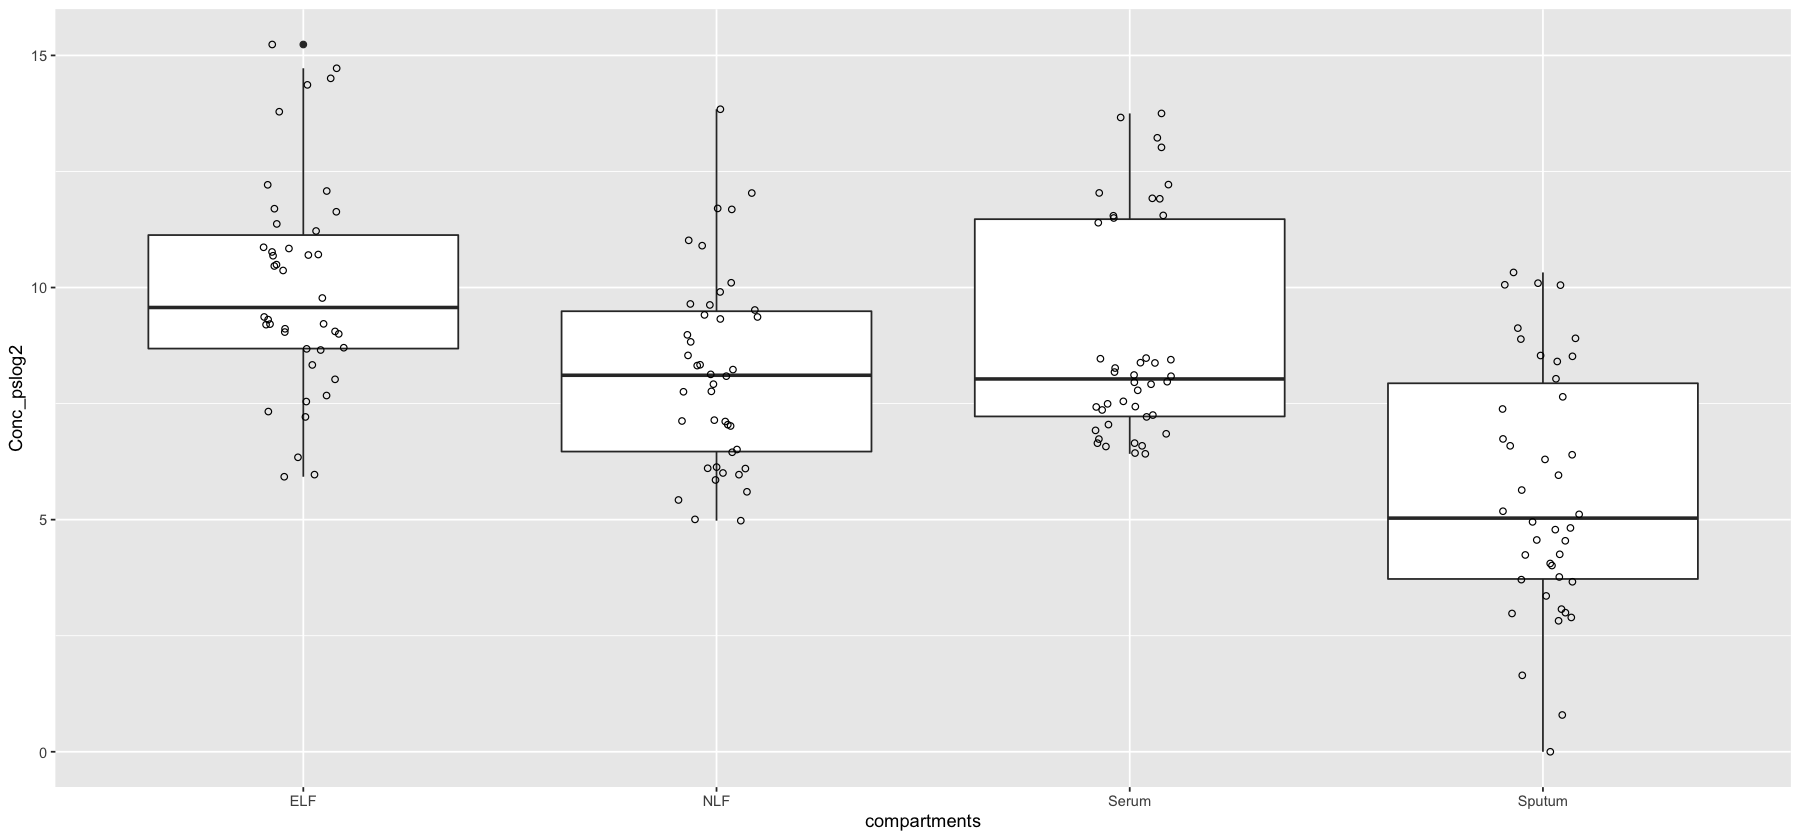

In [27]:
options(repr.plot.width=15, repr.plot.height=7)
#ordering Compartments based on median value
arranged_compartments_df = MIG_scaled_factored %>%
    group_by(Compartment) %>%
    summarize(median_concentration = median(Conc_pslog2)) %>%
    arrange(-median_concentration) %>%
    select(Compartment)

arranged_compartments = arranged_compartments_df$Compartment
compartments = factor(MIG_scaled_factored$Compartment, levels = arranged_compartments) #need to put descending_cytokines into a factor for plotting 
ggplot(MIG_scaled_factored, aes(x = compartments, y = Conc_pslog2)) +
  geom_boxplot() +
  geom_point(cex = 1.5, pch = 1.0,position = position_jitter(w = 0.1, h = 0)) 